In [1]:
import sys
# sys.path.append('../scripts/')
from query import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
if 0:
    df_HWO = pd.read_excel('../data/HWO_target_list_164.xlsx')
    df_HWO

    df_HWO['hd_name'] = df_HWO['hd_name'].fillna('').str.replace(r'\s+', '', regex=True)

    filename = '../data/HWO_target_list_164_update.xlsx'
    df_HWO.to_excel(filename, index=False)

    df_HWO

In [3]:
file_path = "../data/HWO_target_list_164.txt"

# Read the file into a DataFrame
df_HWO = pd.read_csv(file_path, sep="\t", header=36, usecols=lambda column: column != 'loc_rowid')

# Read the column headers from the file
with open(file_path, 'r') as file:
    lines = file.readlines()
    column_headers = [line.split(':')[1].strip() for line in lines[5:35]]

# Add ' (HWO)' to each column header
column_headers = [f"{header} (HWO)" for header in column_headers]

# Assign the new column headers to the DataFrame
df_HWO.columns = column_headers

df_HWO['HD ID (HWO)'] = df_HWO['HD ID (HWO)'].fillna('').str.replace(r'\s+', '', regex=True)

filename = '../data/HWO_target_list_164_update.xlsx'
df_HWO.to_excel(filename, index=False)

# Display the first few rows of the DataFrame
df_HWO.head()


,HIP ID (HWO),HIP Component ID (HWO),HD ID (HWO),HR ID (HWO),GJ ID (HWO),Constellation ID (HWO),Host Name (HWO),Distance [pc] (HWO),RA [deg] (HWO),Dec [deg] (HWO),...,Stellar Metallicity [dex] (HWO),Stellar Surface Gravity [log10(cm/s**2)] (HWO),Stellar Ca II Chromospheric Activity Index [log R HK] (HWO),Earth Equivalent Insolation Distance [au] (HWO),Earth Equivalent Insolation Distance [mas] (HWO),Earth Equivalent Planet-Star Ratio (HWO),Earth Equivalent R (Cousins) Magnitude (HWO),Orbital Period at EEID [days] (HWO),Earth Equivalent Radial Velocity Amplitude [cm/s] (HWO),Earth Equivalent Astrometric Amplitude [uas] (HWO)
0,HIP 42438,NaN,HD72905,HR 3391,GJ 311,3 UMa,3 Ursae Majoris A,14.4388,129.798769,65.020906,...,-0.07,4.53,-4.375,0.987,68.32,1.190000e-10,30.07,345.2,8.74,0.191
1,HIP 44897,NaN,HD78366,HR 3625,GJ 334.2,NaN,HD 78366,18.9498,137.212793,33.882218,...,0.04,4.50,-4.608,1.126,59.41,9.130000e-11,30.69,419.8,8.16,0.165
2,HIP 45038,A,HD78154A,HR 3616 A,GJ 335A,13 UMa A,13 Ursae Majoris A,20.5169,137.598111,67.134017,...,-0.02,4.07,-4.901,2.018,98.34,2.840000e-11,30.89,951.6,5.76,0.244
3,HIP 48113,NaN,HD84737,HR 3881,GJ 368,NaN,HD 84737,18.8226,147.147381,46.021007,...,0.10,4.12,-5.085,1.672,88.83,4.140000e-11,30.66,761.6,6.71,0.248
4,HIP 51459,A,HD90839,HR 4112 A,GJ 395,36 UMa A,36 Ursae Majoris A,12.9452,157.656580,55.980539,...,-0.12,4.43,-4.775,1.267,97.87,7.210000e-11,29.87,479.5,7.36,0.249


In [4]:
if 0:   
    merged_df = pd.read_excel('../results/stars_without_bright_neighbors.xlsx', dtype={'source_id': str, 'source_id_dr2': str, 'source_id_dr3': str, 'HIP Number': str})
    merged_df[['HD Number 1', 'HD Number 2']] = merged_df['HD Number'].str.split(', ', expand=True, n=1)
    # Clean up 'HD Number 1' and 'HD Number 2' by removing extra spaces after 'HD'
    merged_df['HD Number 1'] = merged_df['HD Number 1'].str.replace(r'HD\s+', 'HD', regex=True)
    merged_df['HD Number 2'] = merged_df['HD Number 2'].fillna('').str.replace(r'HD\s+', 'HD', regex=True)

    merged_df = merged_df[merged_df['HZ Detection Limit [M_Earth]'] < 1.5]
    merged_df.head()

In [5]:
merged_df = pd.read_excel('../results/Gaia_homogeneous_target_selection_M_earth_4_Jinglin_2025.01.09.xlsx', dtype={'source_id': str, 'source_id_dr2': str, 'source_id_dr3': str, 'HIP Number': str})

# Add ' (Jinglin)' to each column name
merged_df.columns = [f"{col} (Jinglin)" for col in merged_df.columns]

merged_df.head()


,source_id (Jinglin),source_id_dr2 (Jinglin),source_id_dr3 (Jinglin),RA (Jinglin),DEC (Jinglin),V_mag (Jinglin),Phot G Mean Mag (Jinglin),Phot BP Mean Mag (Jinglin),Phot RP Mean Mag (Jinglin),BP-RP (Jinglin),...,Stellar Parameter Source (Jinglin),SIMBAD Spectral Type (Jinglin),Readable Spectral Type (Jinglin),HZ Detection Limit Simplified [M_Earth] (Jinglin),Distance [pc] (Jinglin),V_mag_group (Jinglin),HD Number 1 (Jinglin),HD Number 2 (Jinglin),GJ Number 1 (Jinglin),GJ Number 2 (Jinglin)
0,5164707970261890560,5164707970261630080,5164707970261890560,53.228293,-9.458168,3.751866,3.465752,3.982448,2.842150,1.140298,...,GAIA,NaN,NaN,0.291567,3.219810,Brightest,HD22049,NaN,GJ144.0,GJ144
1,2452378776434477184,2452378776434276992,2452378776434477184,26.009055,-15.933680,3.571156,3.300400,3.799520,2.748299,1.051221,...,SIMBAD + empirical,G8V,G8V,0.357365,3.652171,Brightest,HD10700,NaN,GJ71.0,GJ71
2,6412595290592307840,6412595290592307840,6412595290592307840,330.872408,-56.797255,4.673484,4.322904,4.907977,3.610557,1.297420,...,GAIA,NaN,NaN,0.384669,3.638439,Bright,HD209100,NaN,GJ845A,GJ845
3,4468557611984384512,NaN,4468557611984384512,271.364454,2.495224,4.182264,3.987364,4.409446,3.405753,1.003693,...,GAIA,NaN,NaN,0.445039,5.113328,Brightest,HD165341A,NaN,GJ702A,NaN
4,3195919528989223040,3195919528988725120,3195919528989223040,63.807953,-7.668078,4.382878,4.179894,4.610995,3.569749,1.041245,...,GAIA,NaN,NaN,0.477135,5.009819,Brightest,HD26965,NaN,GJ166A,NaN


In [8]:
# ---------------------------------------------------------------- #
#  Merge
# ---------------------------------------------------------------- #
# Perform left merges on various columns and combine results
merge_keys = ['HD Number 1 (Jinglin)', 'HD Number 2 (Jinglin)']
merged_HWO = pd.concat([df_HWO.merge(merged_df, left_on='HD ID (HWO)', right_on=key, how='left') for key in merge_keys])

# Sort the combined DataFrame by 'source_id' to prioritize non-null values
merged_HWO.sort_values(by='source_id (Jinglin)', ascending=False, inplace=True)

# Remove duplicate entries based on 'star_ID  ', keeping the first occurrence
merged_HWO.drop_duplicates(subset='HD ID (HWO)', keep='first', inplace=True)

# Reset the index of the final DataFrame
merged_HWO.reset_index(drop=True, inplace=True)

# Save the final DataFrame to an Excel file
filename = '../results/merged_HWO_M_earth_4_Jinglin_2025.01.09.xlsx'
merged_HWO.to_excel(filename, index=False)
adjust_column_widths(filename)




In [9]:
def plot_scatter_with_options(df, col_x, col_y, min_value=None, max_value=None, label=False):
    # Create a scatter plot with color mapping
    plt.figure(figsize=(8, 6), dpi=150)
    scatter = plt.scatter(
        df[col_x], 
        df[col_y], 
        c=df['T_eff [K] (Jinglin)'], 
        cmap='autumn', 
        edgecolor='k', 
        alpha=0.7
    )

    # Add titles and labels
    # plt.title('Selection Crossmatch', fontsize=14)
    plt.xlabel(f'{col_x}', fontsize=12)
    plt.ylabel(f'{col_y}', fontsize=12)

    # Add a color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('T_eff [K]', fontsize=12)

    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Plot the x = y line
    if min_value is None:
        min_value = min(min(df[col_x]), min(df[col_y]))
    if max_value is None:
        max_value = max(max(df[col_x]), max(df[col_y]))
    plt.plot([min_value, max_value], [min_value, max_value], color='gray', linestyle='--')
    plt.xlim(min_value, max_value)
    plt.ylim(min_value, max_value)

    if label:
        # Add labels to each point
        x_range = max_value - min_value
        x_offset = x_range * 0.01
        for i, name in enumerate(df['HD ID (HWO)']):
            if (df[col_x][i] > min_value) and (df[col_x][i] < max_value) and (df[col_y][i] > min_value) and (df[col_y][i] < max_value):
                plt.text(df[col_x][i] - x_offset, df[col_y][i], name, fontsize=5, ha='right')    

    plt.tight_layout()
    plt.savefig('crossmatch_' + col_y.strip().replace(" ", "_").replace("[", "").replace("]", "").replace("/", "") + '.png')
    # Show the plot
    plt.show()


In [10]:
merged_HWO

,HIP ID (HWO),HIP Component ID (HWO),HD ID (HWO),HR ID (HWO),GJ ID (HWO),Constellation ID (HWO),Host Name (HWO),Distance [pc] (HWO),RA [deg] (HWO),Dec [deg] (HWO),...,Stellar Parameter Source (Jinglin),SIMBAD Spectral Type (Jinglin),Readable Spectral Type (Jinglin),HZ Detection Limit Simplified [M_Earth] (Jinglin),Distance [pc] (Jinglin),V_mag_group (Jinglin),HD Number 1 (Jinglin),HD Number 2 (Jinglin),GJ Number 1 (Jinglin),GJ Number 2 (Jinglin)
0,HIP 7981,NaN,HD10476,HR 493,GJ 68,107 Psc,107 Piscium,7.6439,25.624011,20.268513,...,GAIA,NaN,NaN,0.663346,7.643894,Bright,HD10476,NaN,GJ68.0,GJ68
1,HIP 99825,NaN,HD192310,HR 7722,GJ 785,NaN,HD 192310,8.8116,303.822464,-27.032975,...,GAIA,NaN,NaN,0.758632,8.811568,Bright,HD192310,NaN,GJ785,NaN
2,HIP 89042,NaN,HD165499,HR 6761,GJ 9616,iot Pav,Iota Pavonis,17.7532,272.608974,-62.002220,...,GAIA,NaN,NaN,1.497684,17.794841,Bright,HD165499,NaN,GJ9616,GJ705.1
3,HIP 113283,NaN,HD216803,HR 8721,GJ 879,TW PsA,Fomalhaut B,7.6015,344.100219,-31.565564,...,GAIA,NaN,NaN,0.836636,7.601527,Dim,HD216803,NaN,GJ879,NaN
4,HIP 107649,NaN,HD207129,HR 8323,GJ 838,NaN,HD 207129,15.5589,327.065630,-47.303616,...,GAIA,NaN,NaN,1.420482,15.558957,Bright,HD207129,NaN,GJ838,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,HIP 23693,NaN,HD33262A,HR 1674 A,GJ 189,zet Dor A,Zeta Doradus A,11.6927,76.377732,-57.472705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,HIP 69965,A,HD125276A,HR 5356 A,GJ 9476A,NaN,HD 125276 A,17.9888,214.753732,-25.815425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,HIP 910,NaN,HD693,HR 33,GJ 10,6 Cet,6 Ceti,18.8861,2.816075,-15.467978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,HIP 112447,A,HD215648A,HR 8665,GJ 872A,xi Peg A,Xi Pegasi A,16.1509,341.673249,12.172886,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


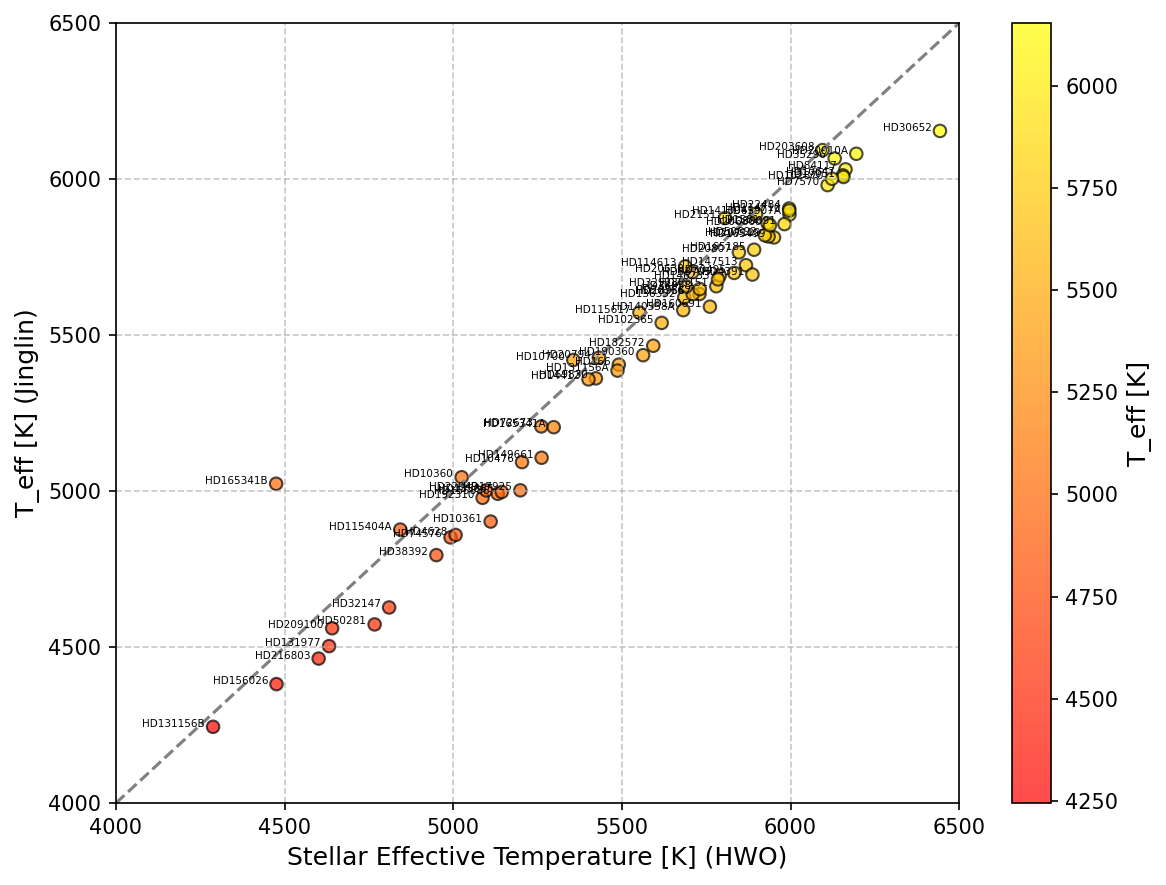

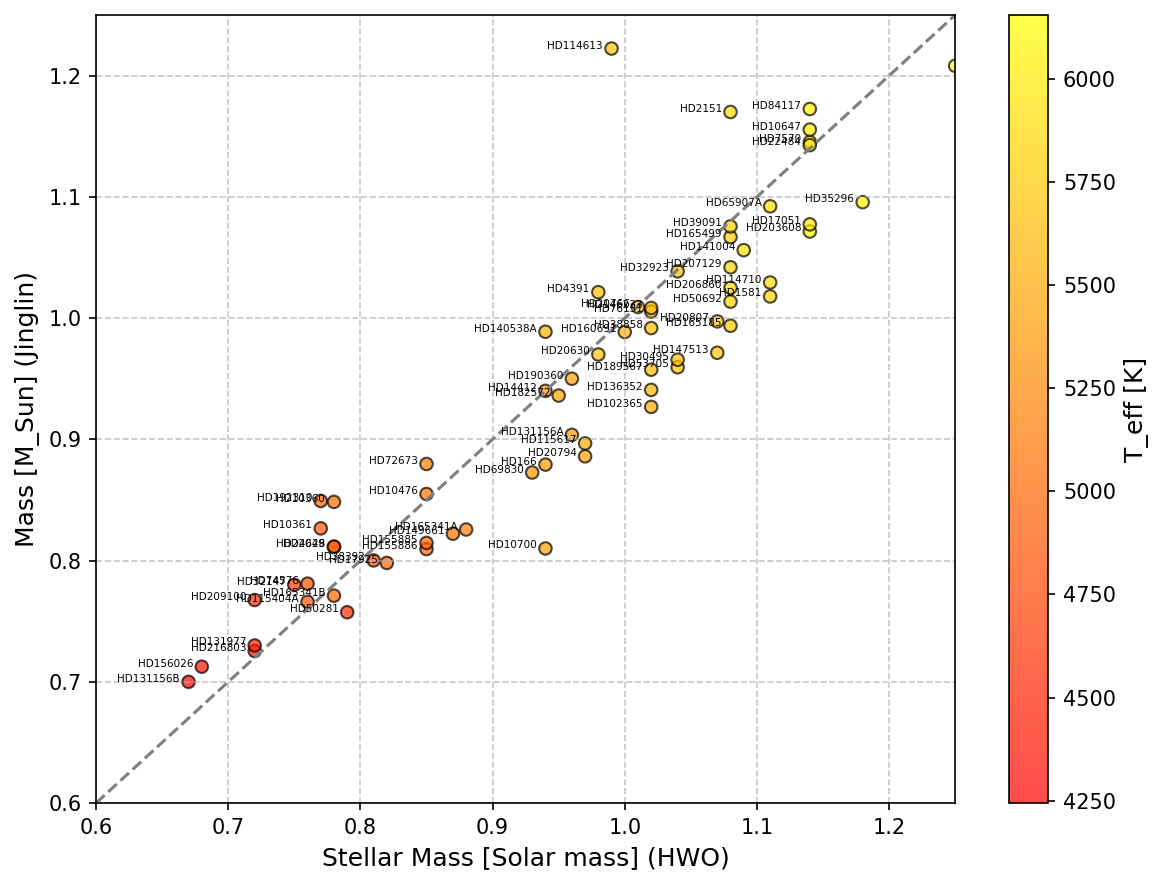

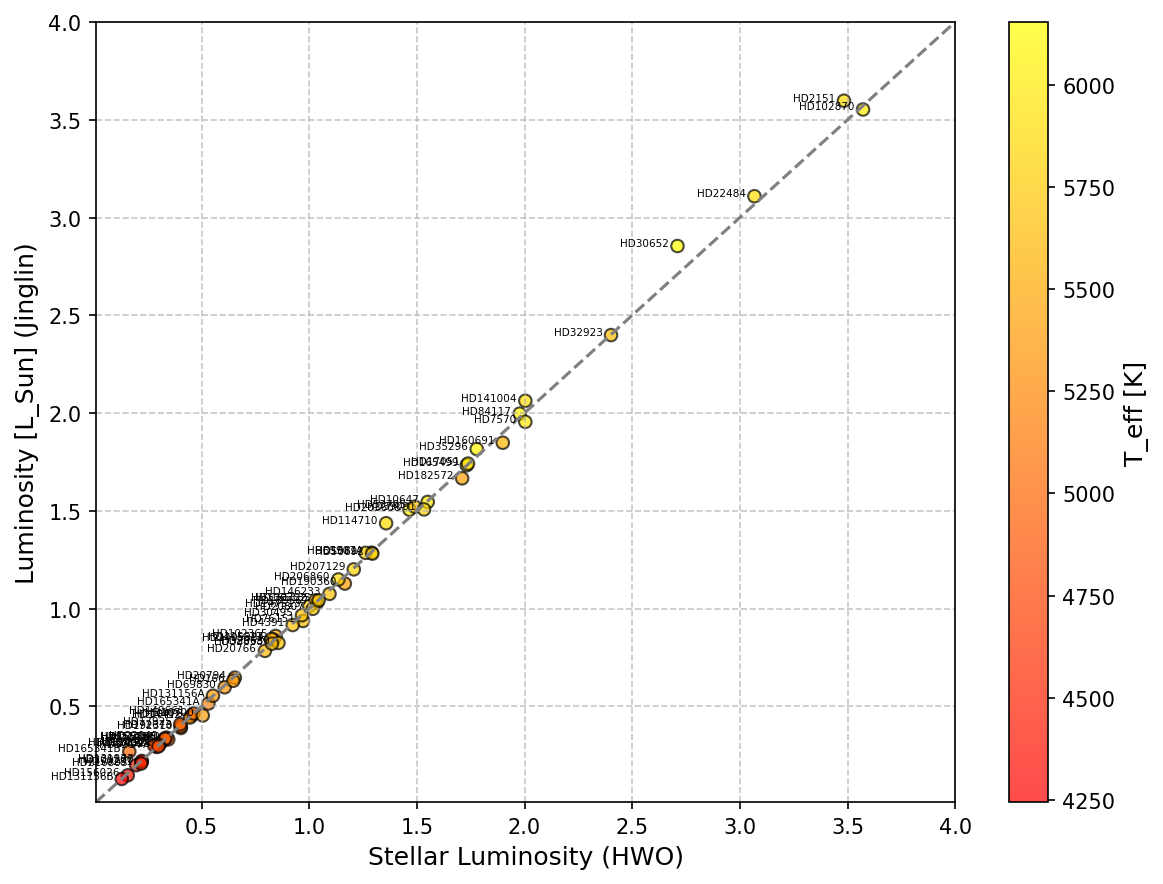

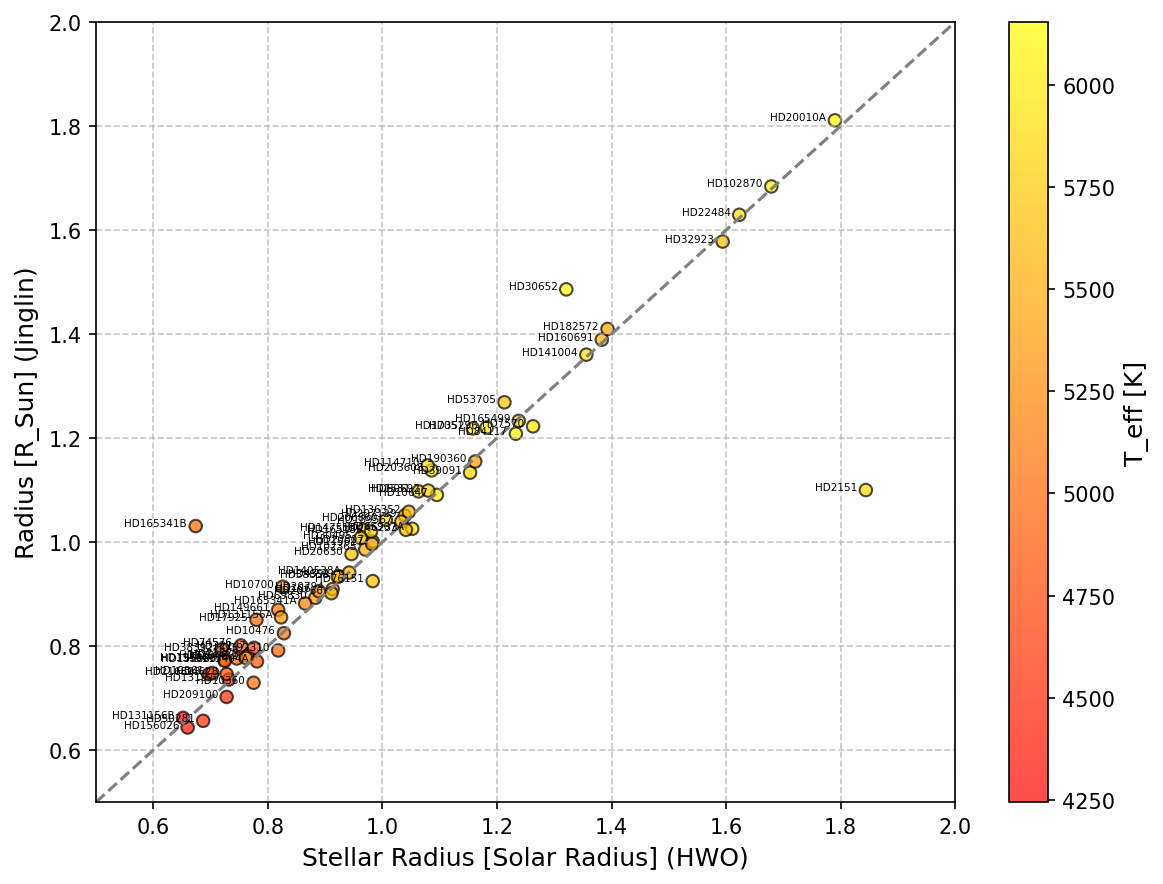

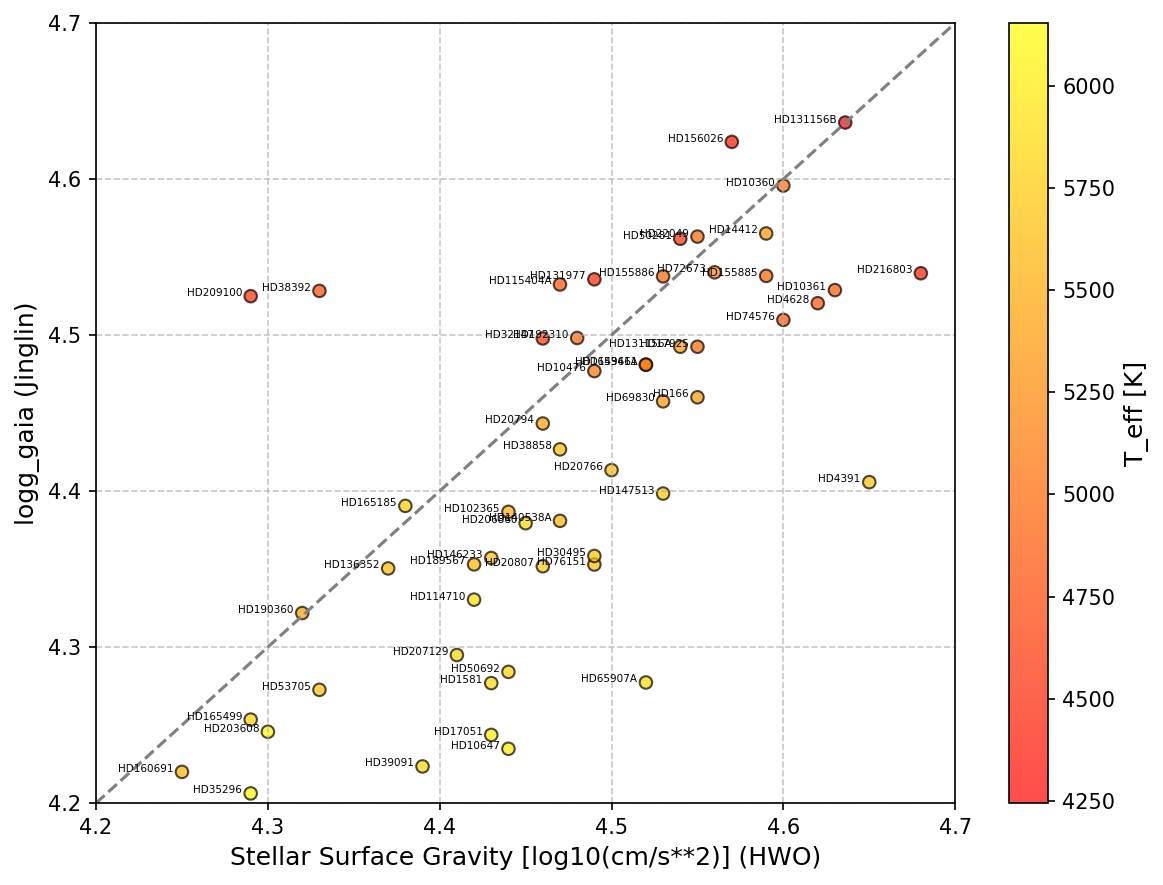

In [11]:
plot_scatter_with_options(merged_HWO, 'Stellar Effective Temperature [K] (HWO)', 'T_eff [K] (Jinglin)', min_value = 4000, max_value = 6500, label=True)
plot_scatter_with_options(merged_HWO, 'Stellar Mass [Solar mass] (HWO)', 'Mass [M_Sun] (Jinglin)', min_value = 0.6, max_value = 1.25, label=True)
merged_HWO['Stellar Luminosity (HWO)'] = 10**merged_HWO['Stellar Luminosity [log10(Solar)] (HWO)']
plot_scatter_with_options(merged_HWO, 'Stellar Luminosity (HWO)', 'Luminosity [L_Sun] (Jinglin)', min_value = 0.01, max_value=4, label=True)
plot_scatter_with_options(merged_HWO, 'Stellar Radius [Solar Radius] (HWO)', 'Radius [R_Sun] (Jinglin)', min_value = 0.5, max_value=2, label=True)
plot_scatter_with_options(merged_HWO, 'Stellar Surface Gravity [log10(cm/s**2)] (HWO)', 'logg_gaia (Jinglin)', min_value = 4.2, max_value = 4.7, label=True)




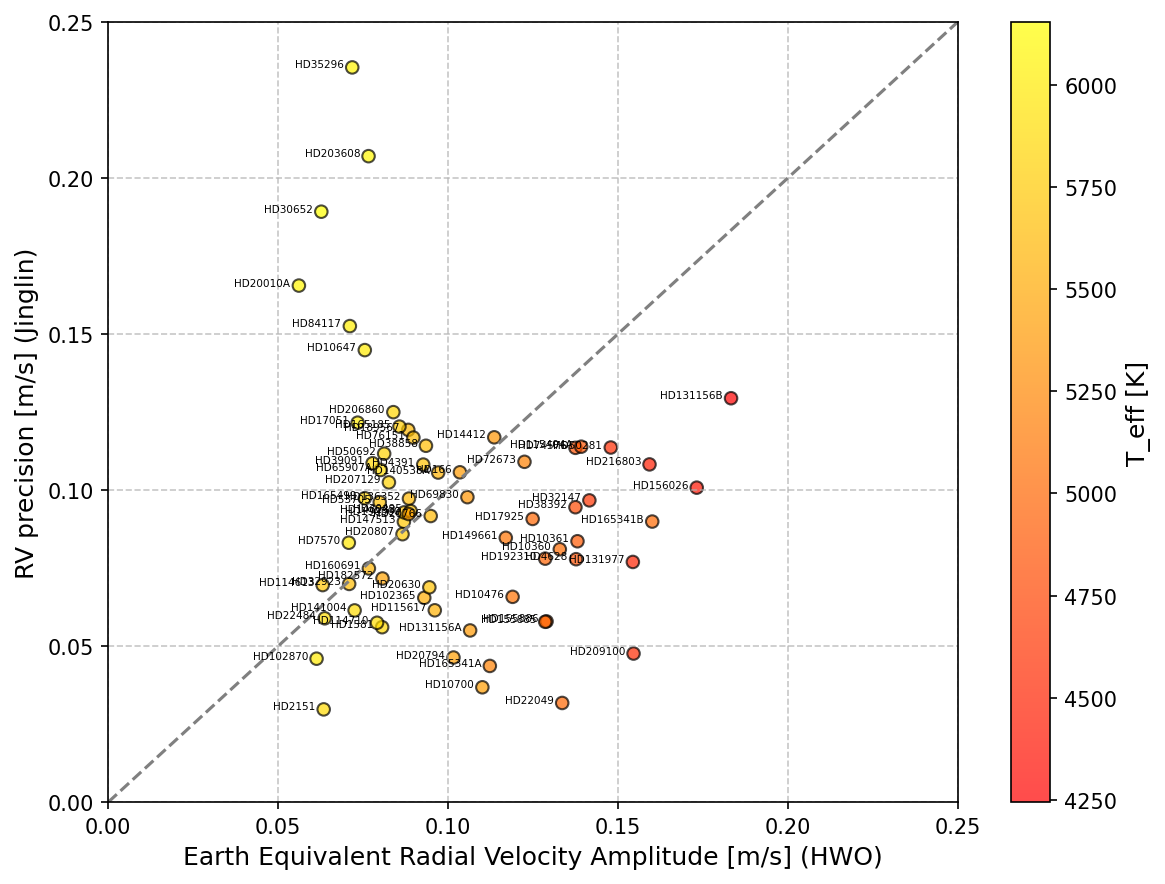

In [12]:
merged_HWO['Earth Equivalent Radial Velocity Amplitude [m/s] (HWO)'] = merged_HWO['Earth Equivalent Radial Velocity Amplitude [cm/s] (HWO)'] / 100
plot_scatter_with_options(merged_HWO, 'Earth Equivalent Radial Velocity Amplitude [m/s] (HWO)', 'RV precision [m/s] (Jinglin)', min_value = 0., max_value=0.25, label=True)
